# WeatherPy
----

### Analysis
* Temperature is clearly highest near the equator, and it dips predictably as one travels further away from the equator. The temperature distribution is not centered perfectly around the equator, but this is to be expected due to the tilt of the earth. For example, on March 4th, 2019, the maximum of a quadratic fit of temperature vs. latitude was centered around 14.7 degrees south of the equator. This makes sense, because the spring equinox does not come until March 19th of 2019, and there is likely a delay after that before the average temperature of the earth's surface centralizes around the axis.
* There is no clear cut relation between humidity and latitude. It does seem that below 20% humidity is rare near the equator. Humidity almost always caps out at 100%, and this tends to coincide with phenomena such as fog and rain. We see that these can happen at any latitude on the earth, hence the continual ceiling of 100% humidity values on the humidity vs. latitude plot.
* There is no obvious relation between cloudiness and latitude here. It is worth addressing that a small number of horizontal lines can be drawn through the cloudiness vs. latitude plot to include all of the data points. While the cloudiness values do tend to cluster around numbers such as 0%, 20%, 40%, etc., this is most likely an artifact of the way that cloudiness is measured and reported: see, for example, https://en.wikipedia.org/wiki/Okta.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

%matplotlib inline

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    nc = citipy.nearest_city(*lat_lng)
    city = nc.city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)        

# Print the city count to confirm sufficient count
len(cities)

607

### API Calls

In [3]:
df = pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {'appid': api_key,
         'q': cities[0],
         'units': 'imperial'}
set_no = 1

print("Beginning Data Retrieval")
print("-"*36)
begin_time = time.time()
for i, c in enumerate(cities):
    params['q'] = c
    data = requests.get(url=base_url, params=params).json()
    print(f"Processing Record {i%50} of Set {set_no} | {c}")
    try:
        city = data['name']
        cloudiness = data['clouds']['all']
        country = data['sys']['country']
        city_date = data['dt']
        humidity = data['main']['humidity']
        lat = data['coord']['lat']
        lng = data['coord']['lon']
        max_temp = data['main']['temp_max']
        wind_speed = data['wind']['speed']
        df.loc[i] = [city, cloudiness, country, city_date, humidity, lat, lng, max_temp, wind_speed]
    except KeyError:
        print("City not found. Skipping...")
    
    # Free API calls are capped at 60 calls per minute, so we play it safe
    # Call in sets of 50, setting timer at the beginning and waiting
    # For it to hit a minute before we continue on to the next set
    if i % 50 == 49:
        set_no += 1
        time.sleep(max([60 - (time.time() - begin_time), 0]))
        begin_time = time.time()

print("-"*30)
print("Data Retrieval Complete.")
print("-"*30)

Beginning Data Retrieval
------------------------------------
Processing Record 0 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 1 | balabac
Processing Record 2 of Set 1 | chipinge
Processing Record 3 of Set 1 | kyabe
Processing Record 4 of Set 1 | nemuro
Processing Record 5 of Set 1 | salalah
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | coihaique
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | saleaula
City not found. Skipping...
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | beringovskiy
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | maasin
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | port alfred
Processin

Processing Record 32 of Set 4 | marabba
Processing Record 33 of Set 4 | charters towers
Processing Record 34 of Set 4 | kostyantynivka
Processing Record 35 of Set 4 | puerto escondido
Processing Record 36 of Set 4 | shibarghan
City not found. Skipping...
Processing Record 37 of Set 4 | arauca
Processing Record 38 of Set 4 | redcar
Processing Record 39 of Set 4 | os
City not found. Skipping...
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | perakhora
City not found. Skipping...
Processing Record 42 of Set 4 | huntington
Processing Record 43 of Set 4 | clyde river
Processing Record 44 of Set 4 | hambantota
Processing Record 45 of Set 4 | hami
Processing Record 46 of Set 4 | chumikan
Processing Record 47 of Set 4 | krasnyy oktyabr
Processing Record 48 of Set 4 | sargatskoye
Processing Record 49 of Set 4 | kozan
City not found. Skipping...
Processing Record 0 of Set 5 | arlit
Processing Record 1 of Set 5 | talaya
Processing Record 2 of Set 5 | kodiak
Processing Rec

Processing Record 20 of Set 8 | xinqing
Processing Record 21 of Set 8 | warrnambool
Processing Record 22 of Set 8 | naze
Processing Record 23 of Set 8 | san jose
Processing Record 24 of Set 8 | swan hill
Processing Record 25 of Set 8 | phan thiet
Processing Record 26 of Set 8 | taitung
Processing Record 27 of Set 8 | miandrivazo
Processing Record 28 of Set 8 | ambilobe
Processing Record 29 of Set 8 | esmeraldas
Processing Record 30 of Set 8 | tazovskiy
Processing Record 31 of Set 8 | fortuna
Processing Record 32 of Set 8 | chatsu
City not found. Skipping...
Processing Record 33 of Set 8 | gamboula
Processing Record 34 of Set 8 | mitu
Processing Record 35 of Set 8 | kuche
City not found. Skipping...
Processing Record 36 of Set 8 | coquimbo
Processing Record 37 of Set 8 | boa vista
Processing Record 38 of Set 8 | voh
Processing Record 39 of Set 8 | xining
Processing Record 40 of Set 8 | ardabil
Processing Record 41 of Set 8 | rosarito
Processing Record 42 of Set 8 | bethel
Processing Rec

Processing Record 10 of Set 12 | sao borja
Processing Record 11 of Set 12 | soeng sang
Processing Record 12 of Set 12 | jabiru
City not found. Skipping...
Processing Record 13 of Set 12 | karamea
City not found. Skipping...
Processing Record 14 of Set 12 | narrabri
Processing Record 15 of Set 12 | cabedelo
Processing Record 16 of Set 12 | nikel
Processing Record 17 of Set 12 | bargal
City not found. Skipping...
Processing Record 18 of Set 12 | bathsheba
Processing Record 19 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 20 of Set 12 | ginebra
Processing Record 21 of Set 12 | atbasar
Processing Record 22 of Set 12 | lamia
Processing Record 23 of Set 12 | havre
Processing Record 24 of Set 12 | makakilo city
Processing Record 25 of Set 12 | ouesso
Processing Record 26 of Set 12 | pingdingshan
Processing Record 27 of Set 12 | virginia beach
Processing Record 28 of Set 12 | sinnamary
Processing Record 29 of Set 12 | nuuk
Processing Record 30 of Set 12 | sobolevo
Proces

### City Dataframe

In [4]:
df.to_csv(output_data_file, index=False)

df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Balabac,24,PH,1551738798,100,7.99,117.06,80.54,11.77
2,Chipinge,0,ZW,1551738799,86,-20.19,32.62,69.74,3.15
3,Kyabe,20,TD,1551738799,51,9.45,18.94,78.34,2.15
4,Nemuro,0,JP,1551738799,100,43.32,145.57,27.94,13.22
5,Salalah,0,OM,1551736200,64,17.01,54.10,75.20,3.36


#### Latitude vs. Temperature Plot
* A quadratic regression curve is included along with the scatter plot.
* This is not meant to suggest anything deep about the underlying nature of the data; it is simply there to illustrate the unimodality of the data, and to show roughly where temperature is maximized with respect to latitude

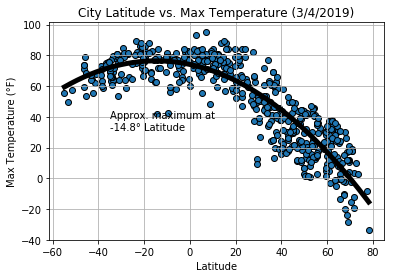

In [5]:
# Translate UNIX timestap into M/D/Y string
the_date = date.fromtimestamp(df['Date'].min())
date_string = '{0:d}/{1:d}/{2:d}'.format(the_date.month, the_date.day, the_date.year)

# Compute quadratic regression for data
beta = np.polyfit(df['Lat'], df['Max Temp'], 2)
def quad_reg (x):
    return sum([beta[2-i]*(x**i) for i in range(len(beta))])

# Compute points in regression
x_axis = np.arange(df['Lat'].min(), df['Lat'].max(), .1)
quad_fit = quad_reg(x_axis)

# Compute latitude which maximizes quadratic fit for temperature
temp_maximizer = -beta[1] / (2*beta[0])

# Plot data points along with regression curve
plt.scatter(df['Lat'], df['Max Temp'], edgecolors='black')
plt.plot(x_axis, quad_fit, color='black', linewidth=5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("City Latitude vs. Max Temperature (" + date_string + ")")
plt.text(x=temp_maximizer-20, y=quad_reg(temp_maximizer)-45, s='Approx. maximum at\n{:.1f}° Latitude'.format(temp_maximizer))

lat_vs_temp_fig = plt.gcf()
lat_vs_temp_fig.savefig('output_data/lat_vs_temp.png')
#lat_vs_temp_fig.show()

#### Latitude vs. Humidity Plot

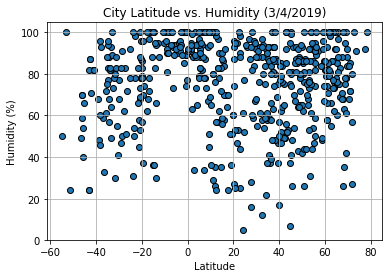

In [6]:
# Somebody mis-entered a data point as 290% humidity one time (I verified this was false),
# and I had to add this to make the plot visually useful.
# While supersaturation is real, humidity
# is rarely if ever above 150%
df_corrected = df[df['Humidity'] <= 150]

plt.scatter(df_corrected['Lat'], df_corrected['Humidity'], edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (" + date_string + ")")

lat_vs_humidity_fig = plt.gcf()
lat_vs_humidity_fig.savefig('output_data/lat_vs_humidity.png')
#lat_vs_humidity_fig.show()

#### Latitude vs. Cloudiness Plot

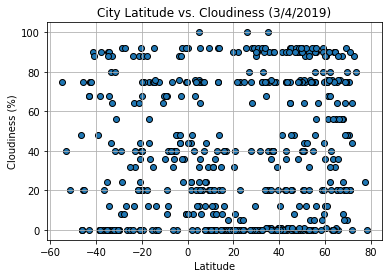

In [7]:
plt.scatter(df['Lat'], df['Cloudiness'], edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (" + date_string + ")")

lat_vs_cloudiness_fig = plt.gcf()
lat_vs_cloudiness_fig.savefig('output_data/lat_vs_cloudiness.png')
#lat_vs_cloudiness_fig.show()

#### Latitude vs. Wind Speed Plot

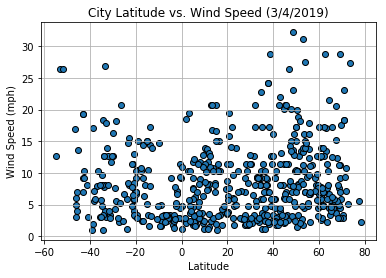

In [8]:
plt.scatter(df['Lat'], df['Wind Speed'], edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (" + date_string + ")")

lat_vs_windspeed_fig = plt.gcf()
lat_vs_windspeed_fig.savefig('output_data/lat_vs_windspeed.png')
#lat_vs_windspeed_fig.show()